In [2]:
## install the packages

!pip3 install opencv-python
!pip3 install seaborn
!pip3 install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
##importing the pacakages

import cv2
import pandas
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

2022-07-05 10:14:24.007856: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/kunal/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-07-05 10:14:24.007954: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [70]:
image_loc = "./dataset/image (1).png"

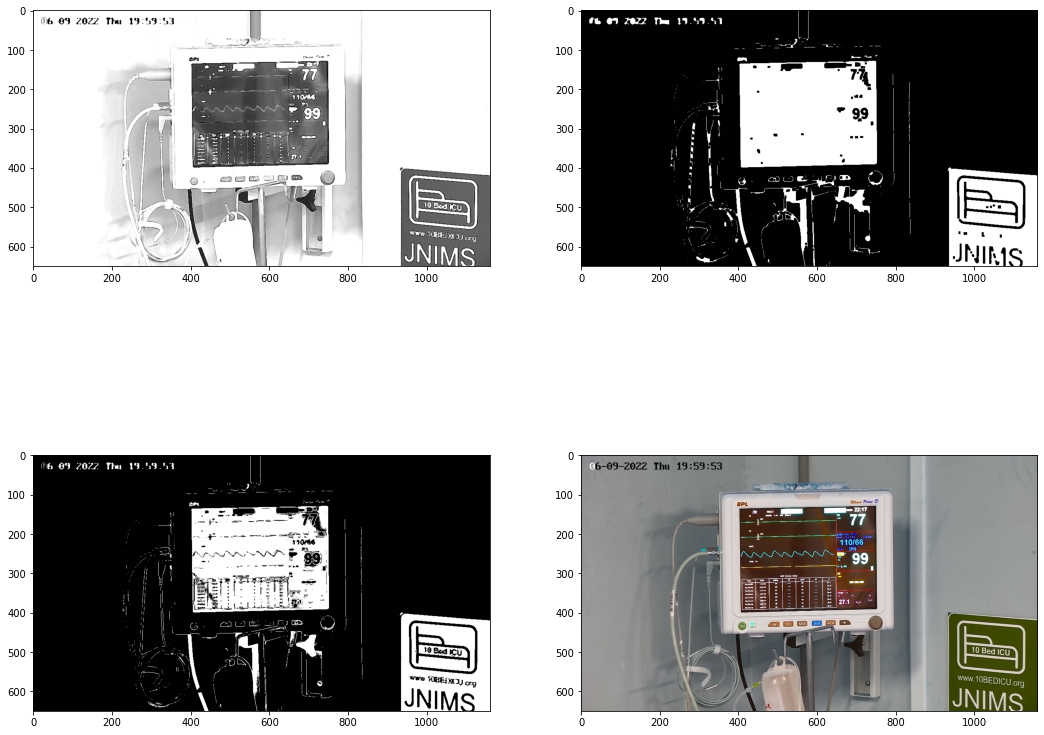

In [71]:
image = cv2.imread(image_loc)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(gray, 5)

sharpen_kernel = np.array([[-1,-1,-1], [-1,10,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(blur, -1, sharpen_kernel)

# Threshold and morph close
thresh = cv2.threshold(sharpen, 125, 255, cv2.THRESH_BINARY_INV)[1]
# thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 145, 0)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

# Find contours and filter using threshold area
cnts = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]


min_area = 100000
max_area = 1500000
image_number = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area and area < max_area:
        x,y,w,h = cv2.boundingRect(c)
        ROI = image[y:y+h, x:x+w]
        cv2.imwrite('ROI_{}.png'.format(image_number), ROI)
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
        image_number += 1
        

fig, ax = plt.subplots(figsize=(18, 15))
        
plt.subplot(2,2,1)
im = plt.imshow(sharpen, 'gray')

plt.subplot(2,2,2)
im = plt.imshow(close, 'gray')

plt.subplot(2,2,3)
im = plt.imshow(thresh, 'gray')

plt.subplot(2,2,4)
im = plt.imshow(image)

plt.show()


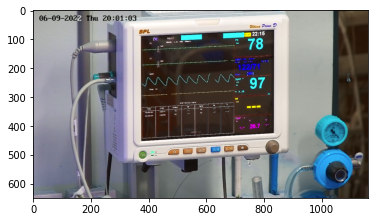

In [68]:
image = cv2.imread(image_loc)
plt.imshow(image)